Aleksandra Bednarczuk

# Predictors of elderly citizens willingness to stay in the neighbourhood
# Logistic regression

Original dataset

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

from scipy import stats

In [3]:
data = pd.read_pickle("survey_transformed.pkl")

In [4]:
data.head()

,ANY,NOM_DISTRICTE,Would_not_stay_in_the_neighborhood,Gender,Time_living_in_barri,Barri_evolution,Barri_future,Barri_satisfaction_of_living,Barri_comparison,GARBAGE COLLECTION,...,Social_class,Living_alone,BCN_evolution,BCN_future,BCN_satisfaction_of_living,BCN_transport,BCN_over_barri_evolution,BCN_over_barri_future,BCN_over_barri_satisfaction_of_living,BCN_over_barri_transport
0,2007,CIUTAT VELLA,0.0,0,I HAVE ALWAYS LIVED IN THE CITY,IT HAS IMPROVED,IT WILL IMPROVE,SATISFIED,"NEITHER THE BEST, NOR THE WORST",GOOD,...,MIDDLE-LOW,0,IT HAS IMPROVED,IT WILL IMPROVE,SATISFIED,GOOD,0,0,0,0
9,2007,CIUTAT VELLA,0.0,1,MORE THAN 10 YEARS,IT IS WORSE,IT WILL STAY THE SAME,SATISFIED,"NEITHER THE BEST, NOR THE WORST",GOOD,...,MIDDLE-LOW,0,IT HAS IMPROVED,IT WILL IMPROVE,SATISFIED,GOOD,1,1,0,1
12,2007,CIUTAT VELLA,0.0,1,I HAVE ALWAYS LIVED IN THE CITY,IT HAS IMPROVED,IT WILL IMPROVE,SATISFIED,ONE OF THE BEST,GOOD,...,MIDDLE-LOW,1,IT HAS IMPROVED,IT WILL IMPROVE,SATISFIED,GOOD,0,0,0,0
14,2007,CIUTAT VELLA,0.0,1,MORE THAN 10 YEARS,IT IS WORSE,IT WILL GET WORSE,SATISFIED,ONE OF THE BEST,GOOD,...,LOW,1,IT IS THE SAME,IT WILL IMPROVE,SATISFIED,GOOD,1,1,0,0
17,2007,CIUTAT VELLA,1.0,1,LESS THAN 10 YEARS,IT IS WORSE,IT WILL GET WORSE,NOT SATISFIED,ONE OF THE WORST,GOOD,...,MIDDLE-MIDDLE,1,IT IS WORSE,IT WILL GET WORSE,NOT SATISFIED,GOOD,0,0,0,0


In [5]:
data.shape

(6914, 34)

In [6]:
# Dataset is imbalanced
data.groupby(['Would_not_stay_in_the_neighborhood']).size()

Would_not_stay_in_the_neighborhood
0.0    6137
1.0     777
dtype: int64

In [7]:
data.columns.tolist()

['ANY',
 'NOM_DISTRICTE',
 'Would_not_stay_in_the_neighborhood',
 'Gender',
 'Time_living_in_barri',
 'Barri_evolution',
 'Barri_future',
 'Barri_satisfaction_of_living',
 'Barri_comparison',
 'GARBAGE COLLECTION',
 'STREETS CLEANING',
 'GREEN AREAS',
 'PUBLIC LIGHTING',
 'ASPHALT AND STREET CONSERVATION',
 'FACADES AND BUILDING CONSERVATION',
 'CIRCULATION',
 'BUS',
 'CITIZEN SECURITY IN THE CITY AS A WHOLE',
 'CITIZEN SECURITY IN THE NEIGHBORHOOD',
 'MUNICIPAL MARKETS',
 'Barri_transport',
 'Owns_a_car',
 'House_size',
 'Monthly_family_income',
 'Social_class',
 'Living_alone',
 'BCN_evolution',
 'BCN_future',
 'BCN_satisfaction_of_living',
 'BCN_transport',
 'BCN_over_barri_evolution',
 'BCN_over_barri_future',
 'BCN_over_barri_satisfaction_of_living',
 'BCN_over_barri_transport']

In [8]:
x_var = data.columns.tolist()

In [9]:
for i in ['ANY', 'NOM_DISTRICTE', 'Would_not_stay_in_the_neighborhood',
          'BCN_evolution', 'BCN_future', 'BCN_satisfaction_of_living', 'BCN_transport']:
    x_var.remove(i)

In [10]:
x = data[x_var]

In [11]:
y = data['Would_not_stay_in_the_neighborhood']

In [12]:
x = pd.get_dummies(x, drop_first = True)

In [14]:
x = sm.add_constant(x)

In [15]:
resampling = SMOTETomek(random_state=0)
 
columns = x.columns
x_resampled, y_resampled = resampling.fit_sample(x, y)
x_resampled = pd.DataFrame(data=x_resampled, columns=columns )
y_resampled= pd.DataFrame(data=y_resampled, columns=['Would_not_stay_in_the_neighborhood'])

print("length of oversampled data is ",len(x_resampled))
print("Number of people who would not stay in the neighborhood in resampled data",
      len(y_resampled[y_resampled['Would_not_stay_in_the_neighborhood']==1]))
print("Number of people who would stay in the neighborhood in resampled data",
      len(y_resampled[y_resampled['Would_not_stay_in_the_neighborhood']==0]))
print("Proportion of 'Would_not_stay_in_the_neighborhood' in resampled data is ",
      len(y_resampled[y_resampled['Would_not_stay_in_the_neighborhood']==1])/len(x_resampled))
print("Proportion of subscription data in resampled data is ",
      len(y_resampled[y_resampled['Would_not_stay_in_the_neighborhood']==0])/len(x_resampled))

length of oversampled data is  12274
Number of people who would not stay in the neighborhood in resampled data 6137
Number of people who would stay in the neighborhood in resampled data 6137
Proportion of 'Would_not_stay_in_the_neighborhood' in resampled data is  0.5
Proportion of subscription data in resampled data is  0.5


In [16]:
x_resampled

,const,Gender,Owns_a_car,Living_alone,BCN_over_barri_evolution,BCN_over_barri_future,BCN_over_barri_satisfaction_of_living,BCN_over_barri_transport,Time_living_in_barri_LESS THAN 10 YEARS,Time_living_in_barri_MORE THAN 10 YEARS,...,House_size_51-100 M2,House_size_< 50 M2,House_size_> 150 M2,Monthly_family_income_2001-3000 EUROS,Monthly_family_income_< 1000 EUROS,Monthly_family_income_> 3000 EUROS,Social_class_LOW,Social_class_MIDDLE-HIGH,Social_class_MIDDLE-LOW,Social_class_MIDDLE-MIDDLE
0,1.0,0,0.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1.0,1,0.0,0,1,1,0,1,0,1,...,0,0,0,0,1,0,0,0,1,0
2,1.0,1,0.0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,1.0,1,0.0,1,1,1,0,0,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1.0,1,1.0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12269,1.0,0,1.0,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
12270,1.0,0,0.0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
12271,1.0,0,0.0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
12272,1.0,0,0.0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [17]:
y_resampled['Would_not_stay_in_the_neighborhood'].unique()

array([0., 1.])

In [18]:
logit_model = sm.Logit(y_resampled,x_resampled)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.447559
         Iterations 8
                                       Results: Logit
Model:                  Logit                                 Pseudo R-squared:    0.354     
Dependent Variable:     Would_not_stay_in_the_neighborhood    AIC:                 11066.6694
Date:                   2021-04-23 07:56                      BIC:                 11363.2789
No. Observations:       12274                                 Log-Likelihood:      -5493.3   
Df Model:               39                                    LL-Null:             -8507.7   
Df Residuals:           12234                                 LLR p-value:         0.0000    
Converged:              1.0000                                Scale:               1.0000    
No. Iterations:         8.0000                                                               
--------------------------------------------------------------------------------------------

In [19]:
result.pvalues.sort_values(ascending=False)

Barri_comparison_ONE OF THE WORST                8.576653e-01
ASPHALT AND STREET CONSERVATION_GOOD             7.811046e-01
CIRCULATION_GOOD                                 7.229334e-01
BUS_GOOD                                         2.289466e-01
GARBAGE COLLECTION_GOOD                          1.735874e-01
FACADES AND BUILDING CONSERVATION_GOOD           9.195875e-02
MUNICIPAL MARKETS_GOOD                           7.477653e-02
Owns_a_car                                       3.084444e-02
Time_living_in_barri_LESS THAN 10 YEARS          2.653312e-02
GREEN AREAS_GOOD                                 1.781903e-02
CITIZEN SECURITY IN THE NEIGHBORHOOD_GOOD        1.265117e-02
House_size_> 150 M2                              6.294316e-03
Living_alone                                     5.581863e-03
CITIZEN SECURITY IN THE CITY AS A WHOLE_GOOD     2.649050e-03
Time_living_in_barri_MORE THAN 10 YEARS          1.899111e-03
Monthly_family_income_> 3000 EUROS               1.500825e-04
STREETS 

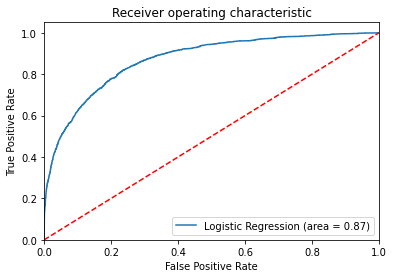

In [20]:
logit_roc_auc = roc_auc_score(y_resampled, result.predict(x_resampled))
fpr, tpr, thresholds = roc_curve(y_resampled, result.predict(x_resampled))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [21]:
# NIE POPRAWIŁAM PONIŻSZEGO FEATURE SELECTION

In [20]:
for i in ['BCN_over_barri_future', 'BCN_over_barri_transport', 
          'House_size_> 150 M2', 'House_size_< 50 M2', 'House_size_51-100 M2', 'MUNICIPAL POLICE_GOOD']:
    del x_resampled[i]

In [21]:
logit_model = sm.Logit(y_resampled,x_resampled)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.513520
         Iterations 6
                                       Results: Logit
Model:                   Logit                                 Pseudo R-squared:    0.259    
Dependent Variable:      Would_not_stay_in_the_neighborhood    AIC:                 8232.9666
Date:                    2021-04-16 08:28                      BIC:                 8470.3181
No. Observations:        7950                                  Log-Likelihood:      -4082.5  
Df Model:                33                                    LL-Null:             -5510.5  
Df Residuals:            7916                                  LLR p-value:         0.0000   
Converged:               1.0000                                Scale:               1.0000   
No. Iterations:          6.0000                                                              
--------------------------------------------------------------------------------------------

In [22]:
result.pvalues.sort_values(ascending=False)

Gender                                           4.018904e-01
Living_alone                                     8.928633e-02
GREEN AREAS_GOOD                                 6.317250e-02
STREETS CLEANING_GOOD                            2.564230e-02
Barri_transport_GOOD                             2.130417e-02
CITIZEN SECURITY IN THE CITY AS A WHOLE_GOOD     2.102744e-02
Barri_transport_NORMAL                           9.984677e-03
BUS_GOOD                                         4.705716e-03
CIRCULATION_GOOD                                 4.394148e-03
Owns_a_car                                       2.582447e-03
ASPHALT AND STREET CONSERVATION_GOOD             1.583305e-03
PUBLIC LIGHTING_GOOD                             5.083849e-04
Time_living_in_barri_MORE THAN 10 YEARS          1.683317e-04
Barri_comparison_ONE OF THE WORST                1.742342e-05
Time_living_in_barri_LESS THAN 10 YEARS          5.233888e-06
Barri_evolution_IT IS THE SAME                   2.457935e-06
Social_c

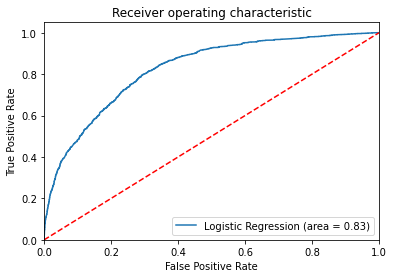

In [23]:
logit_roc_auc = roc_auc_score(y_resampled, result.predict(x_resampled))
fpr, tpr, thresholds = roc_curve(y_resampled, result.predict(x_resampled))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [24]:
del x_resampled['Gender']

In [25]:
logit_model = sm.Logit(y_resampled,x_resampled)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.513564
         Iterations 6
                                       Results: Logit
Model:                   Logit                                 Pseudo R-squared:    0.259    
Dependent Variable:      Would_not_stay_in_the_neighborhood    AIC:                 8231.6691
Date:                    2021-04-16 08:29                      BIC:                 8462.0397
No. Observations:        7950                                  Log-Likelihood:      -4082.8  
Df Model:                32                                    LL-Null:             -5510.5  
Df Residuals:            7917                                  LLR p-value:         0.0000   
Converged:               1.0000                                Scale:               1.0000   
No. Iterations:          6.0000                                                              
--------------------------------------------------------------------------------------------

In [26]:
result.pvalues.sort_values(ascending=False)

Living_alone                                     1.160208e-01
GREEN AREAS_GOOD                                 5.986694e-02
STREETS CLEANING_GOOD                            2.724787e-02
Barri_transport_GOOD                             1.984861e-02
CITIZEN SECURITY IN THE CITY AS A WHOLE_GOOD     1.864098e-02
Barri_transport_NORMAL                           1.011663e-02
CIRCULATION_GOOD                                 5.029742e-03
BUS_GOOD                                         3.890754e-03
Owns_a_car                                       1.795596e-03
ASPHALT AND STREET CONSERVATION_GOOD             1.328543e-03
PUBLIC LIGHTING_GOOD                             4.883210e-04
Time_living_in_barri_MORE THAN 10 YEARS          2.026775e-04
Barri_comparison_ONE OF THE WORST                1.943705e-05
Time_living_in_barri_LESS THAN 10 YEARS          6.070727e-06
Barri_evolution_IT IS THE SAME                   1.722388e-06
Social_class_MIDDLE-MIDDLE                       1.177528e-06
CITIZEN 

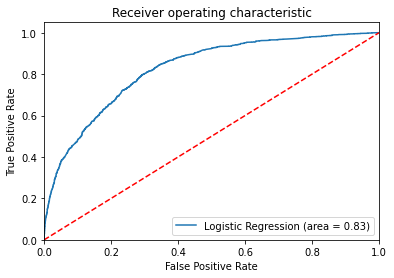

In [27]:
logit_roc_auc = roc_auc_score(y_resampled, result.predict(x_resampled))
fpr, tpr, thresholds = roc_curve(y_resampled, result.predict(x_resampled))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [28]:
print(result.get_margeff().summary())

                Logit Marginal Effects               
Dep. Variable:     Would_not_stay_in_the_neighborhood
Method:                                          dydx
At:                                           overall
                                                  dy/dx    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Owns_a_car                                       0.0341      0.011      3.128      0.002       0.013       0.055
Living_alone                                     0.0188      0.012      1.572      0.116      -0.005       0.042
BCN_over_barri_evolution                        -0.1076      0.018     -5.961      0.000      -0.143      -0.072
BCN_over_barri_satisfaction_of_living            0.1121      0.023      4.948      0.000       0.068       0.156
Time_living_in_barri_LESS THAN 10 YEARS          0.1060      0.023      4.544      0.000       0.060      

In [29]:
result.pred_table()

array([[2885., 1090.],
       [ 937., 3038.]])

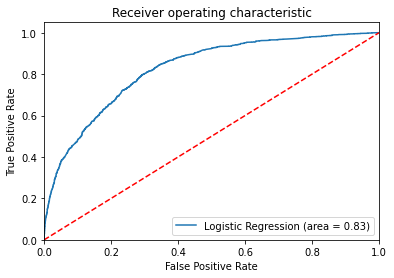

In [30]:
logit_roc_auc = roc_auc_score(y_resampled, result.predict(x_resampled))
fpr, tpr, thresholds = roc_curve(y_resampled, result.predict(x_resampled))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()